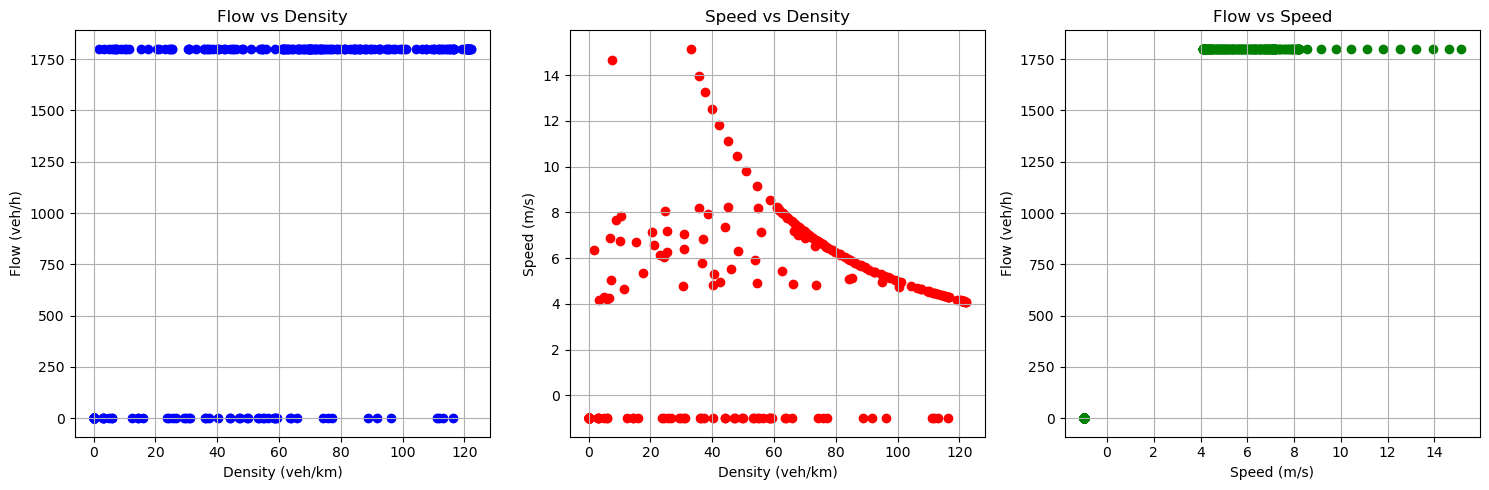

In [1]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np

# Parse the detector output file
tree = ET.parse('output_detector.out.xml')
root = tree.getroot()

# Extract data from each interval
flow = []      # vehicles per hour
speed = []     # m/s
occupancy = [] # percentage

for interval in root.findall('interval'):
    flow.append(float(interval.get('flow')))
    speed.append(float(interval.get('speed')))
    occupancy.append(float(interval.get('occupancy')))

# Calculate density from occupancy
# density = occupancy / (100 * average_vehicle_length)
average_vehicle_length = 4.5  # From your vehicle definitions
density = [occ / (100 * average_vehicle_length) for occ in occupancy]  # in veh/m
density = [d * 1000 for d in density]  # Convert to veh/km

# Create the fundamental diagram plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Flow vs Density
ax1.scatter(density, flow, c='blue')
ax1.set_xlabel('Density (veh/km)')
ax1.set_ylabel('Flow (veh/h)')
ax1.set_title('Flow vs Density')
ax1.grid(True)

# Speed vs Density
ax2.scatter(density, speed, c='red')
ax2.set_xlabel('Density (veh/km)')
ax2.set_ylabel('Speed (m/s)')
ax2.set_title('Speed vs Density')
ax2.grid(True)

# Flow vs Speed
ax3.scatter(speed, flow, c='green')
ax3.set_xlabel('Speed (m/s)')
ax3.set_ylabel('Flow (veh/h)')
ax3.set_title('Flow vs Speed')
ax3.grid(True)

plt.tight_layout()
plt.savefig('fundamental_diagram.png', dpi=300)
plt.show()